# Lab Assignment 11: Data Visualizations
## DS 6001: Practice and Application of Data Science

### Instructions
Please answer the following questions as completely as possible using text, code, and the results of code as needed. Format your answers in a Jupyter notebook. To receive full credit, make sure you address every part of the problem, and make sure your document is formatted in a clean and professional way.

## Problem 0
Import the following libraries:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Problem 1
Write a short paragraph that provides a critique of the following data visualizations. What's good about each figure, and what's not good? Pay particular attention to how well the figure communicates information to a general audience and tells a complete story. Make specific references to the ideas discussed in the first section of the Module 11 Jupyter notebook.

### Part a
<img src="https://i.reddituploads.com/09d4079fd0bf453586b8524478aac4fd?fit=max&h=1536&w=1536&s=0d63d22eed3d44a41002007990acdf2c" width='500'>

[1 point]

**The most obvious and immediately disqualifying problem with this graph is that the size of the bars are completely uncorrelated to the percentage values. This has the effect, for example, of making it seem like the vast majority of voters are not at all concerned about the Zika virus, and that none are somewhat concerned, when according to the percentages "not at all" is the minority and "somewhat" is the second-largest group.**

### Part b
<img src="https://www.designyourway.net/diverse/2/wronginfo/59426786926.jpg" width='600'>

[1 point]

**This visualization does fulfill the one use case of a pie chart (showing the proportion of categories to the total where one category is much larger than all of the others), but not to the extent where a bar chart would not also be effective. Additionally, it being a 3D pie chart and the slices increasing in length as well as width both violate the principle of proportional ink, and the uncorrelated shades of blue needlessly increases complexity of the figure.**

### Part c
<img src="https://i.imgur.com/sTVYOIH.jpg" width='400'>

[1 point]

**This visualization pulls the nasty trick of reversing the y-axis (putting the 0 at the top of the axis rather than its typical position on the bottom), causing the graph to appear to convey the opposite of what the data shows. Specifically, it makes it seems like Florida's Stand Your Ground law is correlated to a drastic decrease in gun deaths, when in fact the data shows a drastic increase.**

## Problem 2
For the rest of this lab, we will once again be working with the 2019 General Social Survey.

In [2]:
%%capture
gss = pd.read_csv("https://github.com/jkropko/DS-6001/raw/master/localdata/gss2018.csv",
                 encoding='cp1252', na_values=['IAP','IAP,DK,NA,uncodeable', 'NOT SURE',
                                               'DK', 'IAP, DK, NA, uncodeable', '.a', "CAN'T CHOOSE"])

Here is code that cleans the data and gets it ready to be used for data visualizations:

In [3]:
mycols = ['id', 'wtss', 'sex', 'educ', 'region', 'age', 'coninc',
          'prestg10', 'mapres10', 'papres10', 'sei10', 'satjob',
          'fechld', 'fefam', 'fepol', 'fepresch', 'meovrwrk'] 
gss_clean = gss[mycols]
gss_clean = gss_clean.rename({'wtss':'weight', 
                              'educ':'education', 
                              'coninc':'income', 
                              'prestg10':'job_prestige',
                              'mapres10':'mother_job_prestige', 
                              'papres10':'father_job_prestige', 
                              'sei10':'socioeconomic_index', 
                              'fechld':'relationship', 
                              'fefam':'male_breadwinner', 
                              'fehire':'hire_women', 
                              'fejobaff':'preference_hire_women', 
                              'fepol':'men_bettersuited', 
                              'fepresch':'child_suffer',
                              'meovrwrk':'men_overwork'},axis=1)
gss_clean.age = gss_clean.age.replace({'89 or older':'89'})
gss_clean.age = gss_clean.age.astype('float')

The `gss_clean` dataframe now contains the following features:

* `id` - a numeric unique ID for each person who responded to the survey
* `weight` - survey sample weights
* `sex` - male or female
* `education` - years of formal education
* `region` - region of the country where the respondent lives
* `age` - age
* `income` - the respondent's personal annual income
* `job_prestige` - the respondent's occupational prestige score, as measured by the GSS using the methodology described above
* `mother_job_prestige` - the respondent's mother's occupational prestige score, as measured by the GSS using the methodology described above
* `father_job_prestige` -the respondent's father's occupational prestige score, as measured by the GSS using the methodology described above
* `socioeconomic_index` - an index measuring the respondent's socioeconomic status
* `satjob` - responses to "On the whole, how satisfied are you with the work you do?"
* `relationship` - agree or disagree with: "A working mother can establish just as warm and secure a relationship with her children as a mother who does not work."
* `male_breadwinner` - agree or disagree with: "It is much better for everyone involved if the man is the achiever outside the home and the woman takes care of the home and family."
* `men_bettersuited` - agree or disagree with: "Most men are better suited emotionally for politics than are most women."
* `child_suffer` - agree or disagree with: "A preschool child is likely to suffer if his or her mother works."
* `men_overwork` - agree or disagree with: "Family life often suffers because men concentrate too much on their work."

### Part a
Reorder the categories of `relationship` to "strongly agree", "agree", "disagree", and "strongly disagree".

Then create a simple barplot that shows the frequencies of the categories of `relationship` three times: 
* once using `matplotlib` alone, 
* once using `seaborn`, 
* and once using the `.plot()` method from `pandas`. 

Make sure each barplot has descriptive axis labels and a title, and set a good size for each figure displayed in the Jupyter notebook. [2 points]

In [4]:
gss_clean['relationship'] = gss_clean['relationship'].astype('category')
gss_clean['relationship'] = gss_clean['relationship'].cat.reorder_categories(["strongly agree", 
                                                                              "agree", 
                                                                              "disagree", 
                                                                              "strongly disagree"])
mybars = gss_clean['relationship'].value_counts().sort_index()
mybars

relationship
strongly agree       480
agree                670
disagree             324
strongly disagree     76
Name: count, dtype: int64

<BarContainer object of 4 artists>

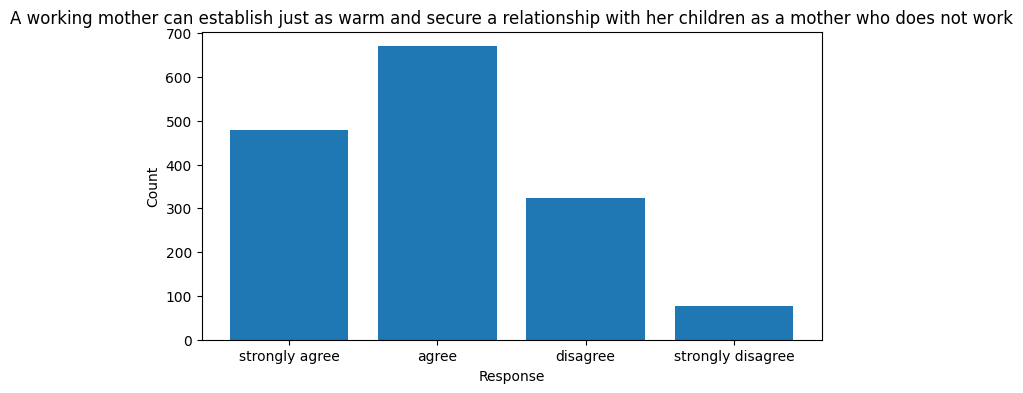

In [5]:
fig, ax = plt.subplots(figsize = (8,4))
ax.set(ylabel = "Count")
ax.set(xlabel = "Response")
ax.set(title = "A working mother can establish just as warm and secure a relationship with her children as a mother who does not work")
plt.bar(mybars.index, mybars.values)

<Axes: title={'center': 'A working mother can establish just as warm and secure a relationship with her children as a mother who does not work'}, xlabel='Response', ylabel='Count'>

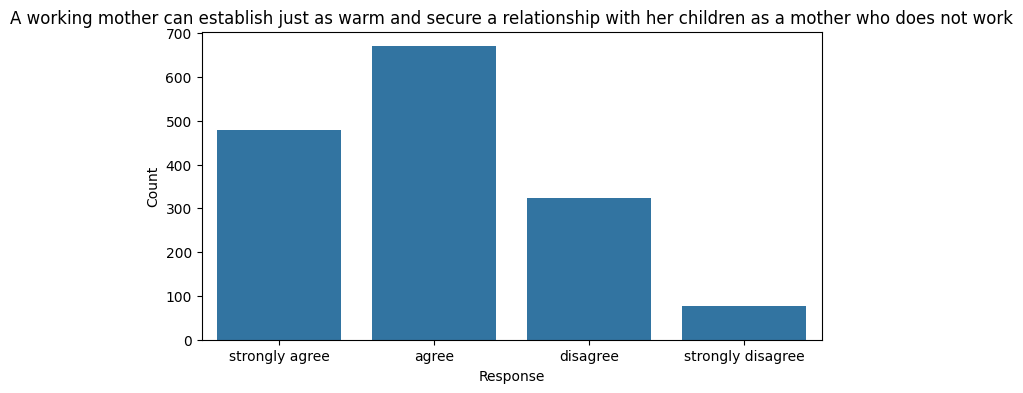

In [6]:
fig, ax = plt.subplots(figsize = (8,4))
ax.set(ylabel = "Count")
ax.set(xlabel = "Response")
ax.set(title = "A working mother can establish just as warm and secure a relationship with her children as a mother who does not work")
sns.barplot(mybars)

<Axes: title={'center': 'A working mother can establish just as warm and secure a relationship with her children as a mother who does not work'}, xlabel='Response', ylabel='Count'>

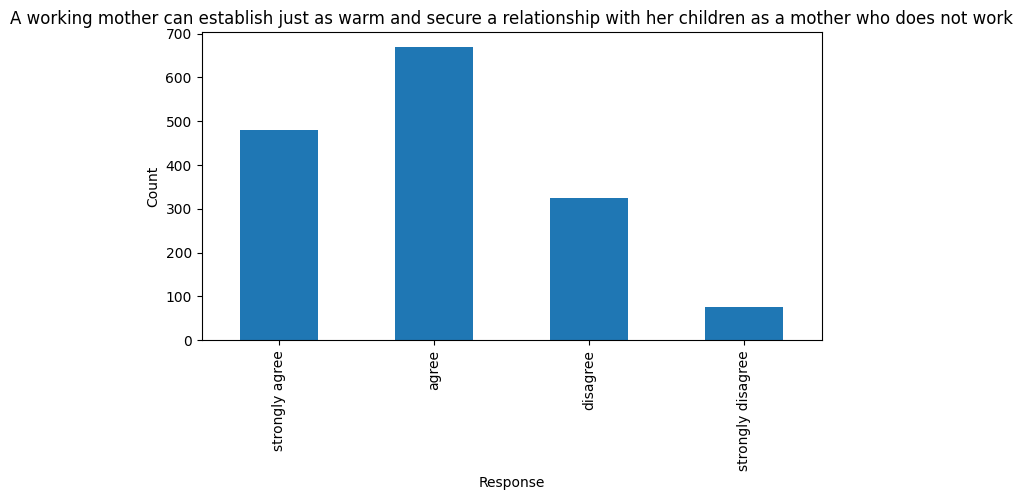

In [7]:
fig, ax = plt.subplots(figsize = (8,4))
ax.set(ylabel = "Count")
ax.set(title = "A working mother can establish just as warm and secure a relationship with her children as a mother who does not work")
mybars.plot(kind='bar', xlabel = "Response")

### Part b
Create two barplots that show 
* the frequency of the different levels of agreement for `relationship` for men and for women on the same plot, 
* with bars for men and bars for women side-by-side,
* using different colors for the bars for men and the bars for women,
* listing these colors and the sex they refer to in a legend,
* and labeling each bar with the number the bar represents.

Create the first barplot using `seaborn` with the bars oriented vertically, and create the second barplot using the `.plot()` method with the bars oriented horizontally. [2 points]

In [8]:
gss_div = gss_clean.groupby(['sex','relationship']).size().reset_index().rename({0: "count"}, axis=1)
gss_div

/var/folders/ds/qp3gbx7n3tz0738b8w4wxs580000gn/T/ipykernel_27000/2626873854.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gss_div = gss_clean.groupby(['sex','relationship']).size().reset_index().rename({0: "count"}, axis=1)


,sex,relationship,count
0,female,strongly agree,337
1,female,agree,344
2,female,disagree,146
3,female,strongly disagree,39
4,male,strongly agree,143
5,male,agree,326
6,male,disagree,178
7,male,strongly disagree,37


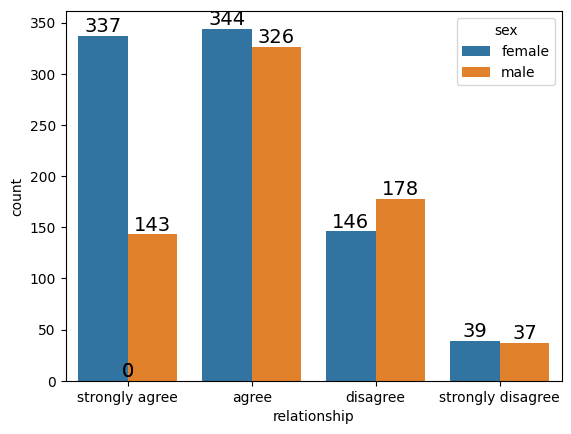

In [9]:
gss_div['sex']=gss_div['sex'].astype('category')
myplot = sns.barplot(x='relationship', y='count', hue='sex', data=gss_div)
for rect in myplot.patches:
    xcoor = rect.get_x() + .5*rect.get_width()
    ycoor = rect.get_height()
    plt.text(xcoor, ycoor, str(int(ycoor)), 
             horizontalalignment='center', 
             verticalalignment='bottom',
             fontsize=14)

### Part c
Create a visualization with 
* nine barplots, arranged in a 3x3 grid. 
* The barplots should refer to each of the nine categories of `region`, 
* and each barplot should be given a label that contains the name of the region.
* Within each barplot, list the categories of `relationship`,
* and display horizontal bars.

Only one figure is required. Use `seaborn`, `matplotlib`, and `.plot()` as you see fit. [2 points]

In [10]:
gss_plot = gss_clean.groupby(['relationship','region']).size().reset_index()
gss_plot = gss_plot.rename({0:'count'}, axis=1)

/var/folders/ds/qp3gbx7n3tz0738b8w4wxs580000gn/T/ipykernel_27000/3854721726.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gss_plot = gss_clean.groupby(['relationship','region']).size().reset_index()


/opt/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


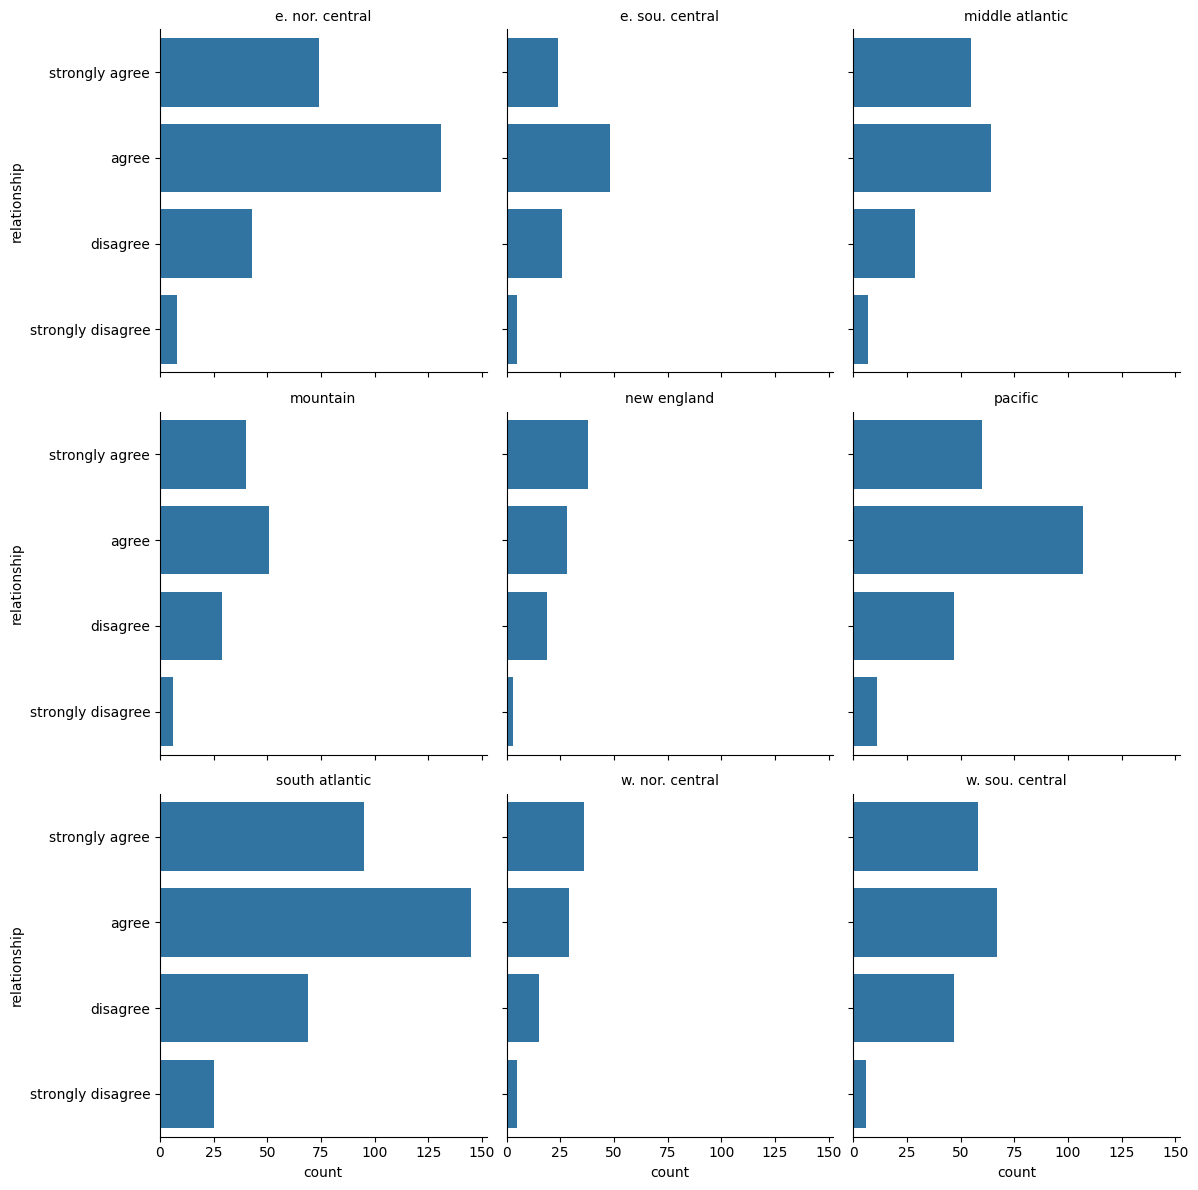

In [11]:
g = sns.FacetGrid(gss_plot, col = 'region', col_wrap=3, height=4, aspect=1)
g.map(sns.barplot, 'count', 'relationship')
g.set_titles('{col_name}')

## Problem 3
Write code that exactly replicates the following figures, including all aesthetic choices. **Don't worry, however, about making the size of the figures exactly the same as that varies from browser to browser.** All of the following figures are generated by a primary graphing function from `seaborn`. 

### Part a
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localimages/parta.png" width='700'>

[Hint: the values of occuptational prestige and socioeconomic status are the means of `job_prestige` and `socioeconomic_index` within years of `education`. Note that values of `education` less than 8 are excluded.] [2 points]

In [12]:
gss_line = pd.melt(gss_clean.groupby(['education']).agg({'job_prestige':'mean', 'socioeconomic_index': 'mean'}).reset_index(),['education'])
replace_map = {'job_prestige':'Occupational Prestige', 'socioeconomic_index': 'Socioeconomic Status'}
gss_line['variable'] = gss_line['variable'].replace(replace_map)
gss_line = gss_line.rename(columns={'variable': 'Index'})

(0.0, 75.99378787878788)

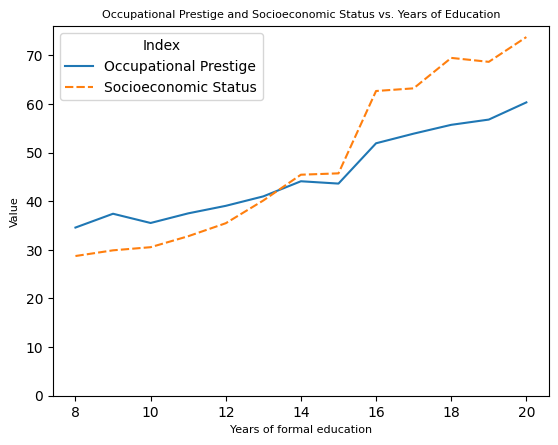

In [13]:
sns.lineplot(x= 'education',y='value', hue = 'Index', style = 'Index', data=gss_line.query("education >= 8"))
plt.xlabel('Years of formal education', size=8)
plt.ylabel('Value', size=8)
plt.title('Occupational Prestige and Socioeconomic Status vs. Years of Education', size=8)
plt.ylim(0,)

### Part b
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localimages/partb.png" width='700'>

[Hint: to match the color scheme, you will need to set `center=0`.] [2 points]

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'job_prestige'),
  Text(0, 1.5, 'father_job_prestige'),
  Text(0, 2.5, 'mother_job_prestige'),
  Text(0, 3.5, 'income'),
  Text(0, 4.5, 'socioeconomic_index')])

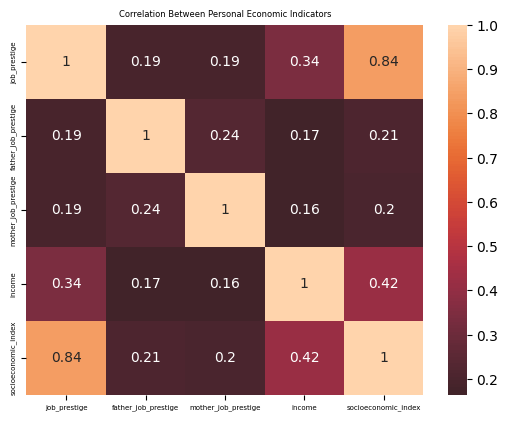

In [14]:
gss_corr = gss_clean.loc[:,['job_prestige','father_job_prestige','mother_job_prestige','income','socioeconomic_index']].corr()
sns.heatmap(gss_corr, annot=True, center=0)
plt.title("Correlation Between Personal Economic Indicators", size=6)
plt.xticks(rotation=0, size=5) 
plt.yticks(rotation=90, size=5) 

### Part c
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localdata/partc2.png" width='600'>

[Hint: The individual plots inside the grid have `height=4` and `aspect=1`, and to include the overall title I used
```
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('Income vs. Prestige by Education', fontsize=16)
```
You will first need to create a version of `education` that collapses values from 0 to 10 to "10 years or fewer" and collapses values from 17 to 20 to "More than 16 years". You can use `.map()`, `.replace()`, or `pd.cut()` to do that.] [3 points]

Text(0.5, 0.98, 'Income vs. Prestige by Education')

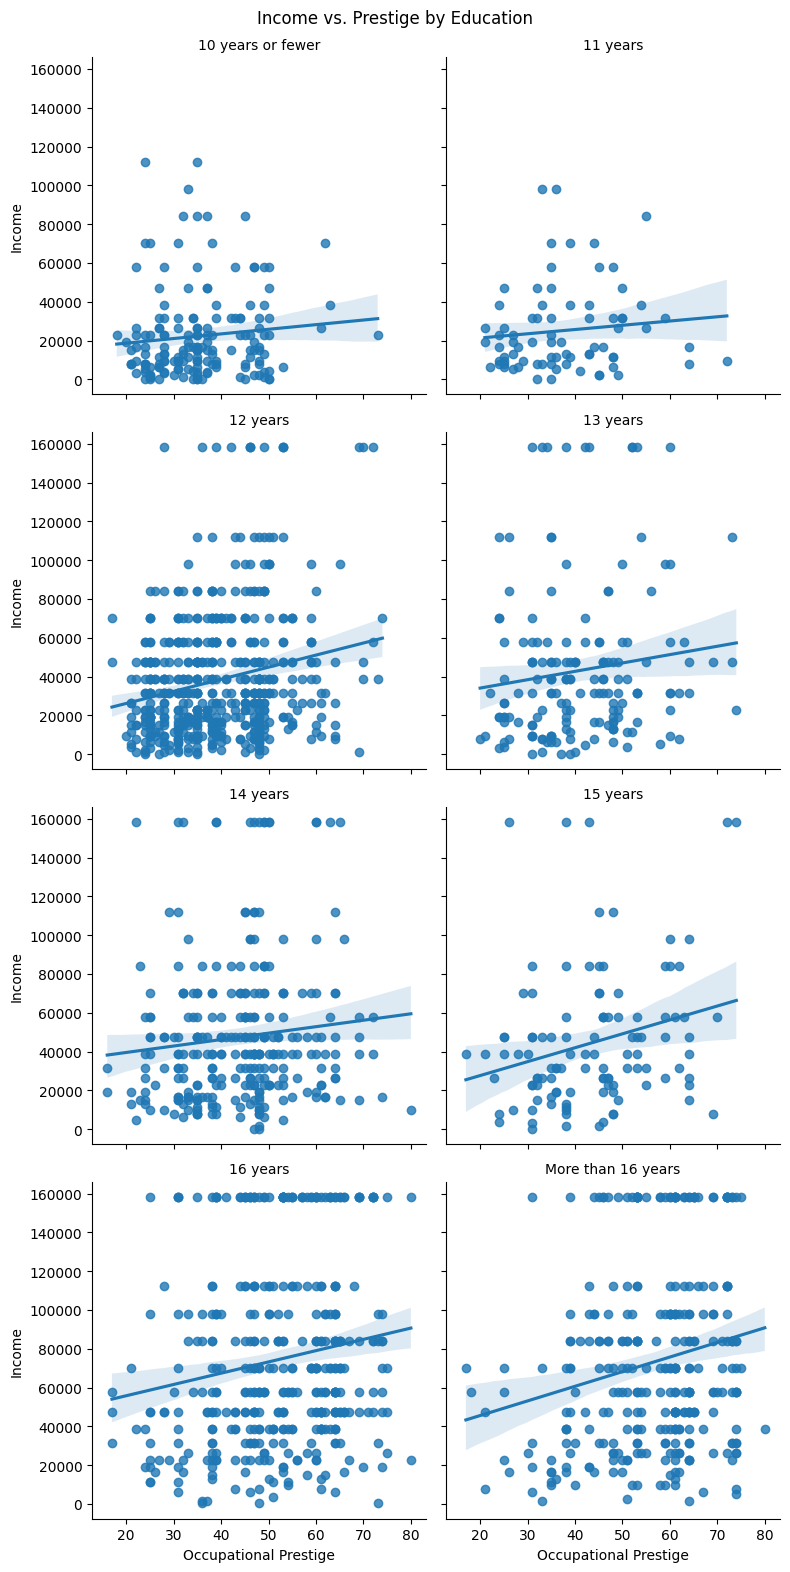

In [15]:
gss_clean['edu_bins'] = pd.cut(gss_clean.education, bins=[0,10,11,12,13,14,15,16,20], labels=("10 years or fewer", 
                                                                                              '11 years','12 years',
                                                                                              '13 years','14 years',
                                                                                              '15 years','16 years',
                                                                                              'More than 16 years'))
g = sns.FacetGrid(gss_clean, col = 'edu_bins', col_wrap=2, height=4, aspect=1)
g.map(sns.regplot, 'job_prestige', 'income')
g.set_titles('{col_name}')
g.set_axis_labels('Occupational Prestige', 'Income') 
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Income vs. Prestige by Education')

## Problem 4
There is a consistent finding that in the United States that [women get paid only 80% of what men get paid](https://nwlc.org/issue/equal-pay-and-the-wage-gap/). Other research however finds that the gap is much smaller when comparing [men and women who hold the same job](https://www.politifact.com/factchecks/2018/apr/13/tina-smith/do-women-get-only-80-percent-pay-men-do-same-job/). In this problem you will use the GSS data to investigate the following questions:

1. Do men have higher incomes than women?

2. If there is a difference, is this difference due to the fact that men have jobs with higher occupational prestige than women?

You may use any kind of data visualization and you may use multiple visualizations to find an answer to these questions. In order to receive credit for this problem, you must write in text what parts of your visualizations are important and what we should learn from the visualizations to answer the questions. Please consider the entire distributions of income and occupational prestige, not just the means or medians. [4 points]

In [16]:
sns.set_style('darkgrid')

Text(0.5, 1.0, 'Graph A')

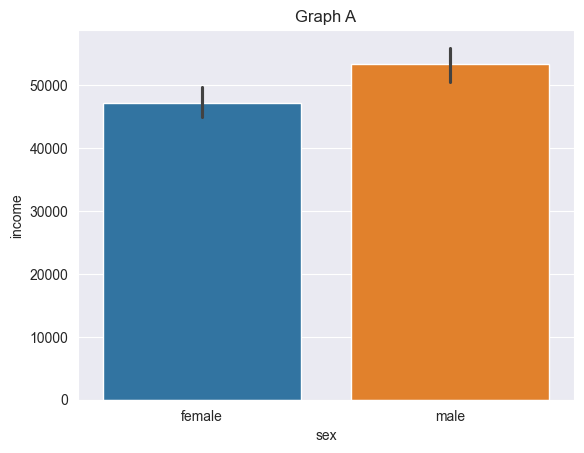

In [17]:
sns.barplot(gss_clean.sort_values('sex'), x='sex', y='income', hue = 'sex')
plt.title("Graph A")

Text(0.5, 1.0, 'Graph B')

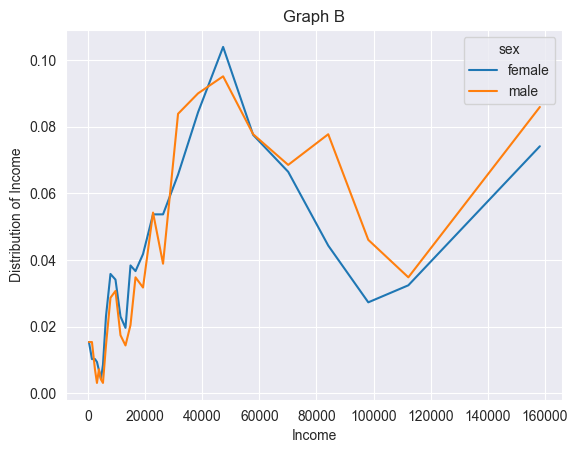

In [18]:
gss_inc = gss_clean.groupby(['sex', 'income']).size().reset_index()
gss_inc['pc'] = gss_inc[0] / gss_inc.groupby('sex')[0].transform('sum')
sns.lineplot(x='income', y='pc', hue='sex', data=gss_inc)
plt.xlabel('Income')
plt.ylabel('Distribution of Income')
plt.title('Graph B')

Text(0.5, 1.0, 'Graph C')

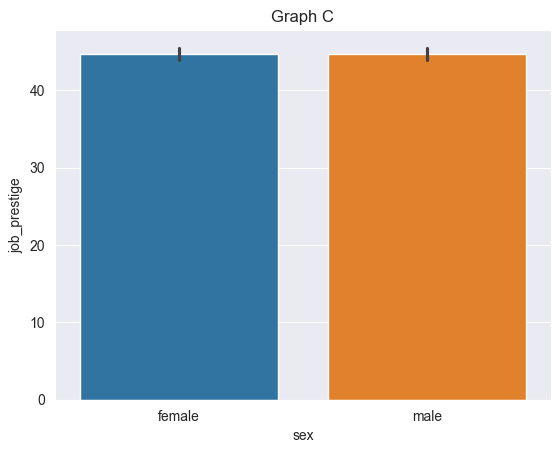

In [19]:
sns.barplot(gss_clean.sort_values('sex'), x='sex', y='job_prestige', hue = 'sex')
plt.title("Graph C")

Text(0.5, 1.0, 'Graph D')

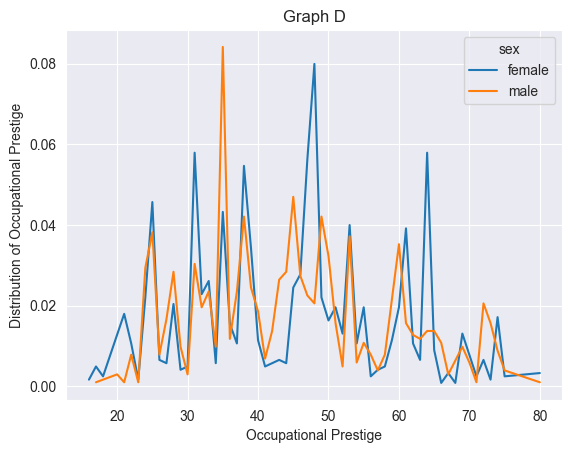

In [20]:
gss_job = gss_clean.groupby(['sex', 'job_prestige']).size().reset_index()
gss_job['pc'] = gss_job[0] / gss_job.groupby('sex')[0].transform('sum')
sns.lineplot(x='job_prestige', y='pc', hue='sex', data=gss_job)
plt.xlabel('Occupational Prestige')
plt.ylabel('Distribution of Occupational Prestige')
plt.title('Graph D')

**As we can see in Graphs A and B, there is clear evidence that in general men have higher incomes than women.  Graph A shows that the average income for men is higher than that for women, and Graph B shows that in the distribution of income men have a denser distribution in higher-paying jobs than women (particularly in the $85,000 range). Graph B also shows that the percent distribution of top and bottom earners for men and women is close to equal, meaning that the difference in average cannot be explained by simple outliers. For Graphs C and D, we can see that this difference is not due to the fact that men have jobs with higher occupational prestige than women, because men do not have jobs with higher occupational prestige than women. Graph C shows the average occupational prestige between men and women is about the same, and Graph D shows that the percentage distributions are also mostly even, with the main differences indicating that women actually have a denser distribution in more prestigious jobs.**